# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:
# ... ENTER YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt

def design_matrix(x, m):
    mat = np.empty(shape=[len(x), m])
    for i in range(m):
        mat[:, i] = np.power(x, i) 
    return mat

def solve_normal_equation(x, y, m):
    A=design_matrix(x, m)
    AT_A=A.T@A
    b=A.T@y
    beta=np.linalg.solve(AT_A,b)
    return beta

def predict(xval, beta):
    term = sum(beta[j]*xval**j for j in range(len(beta)))
    return term

In [3]:
solve_normal_equation(x, y, 4)

array([ 0.49483598, -0.26983377, -2.01973166,  1.01540301])

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

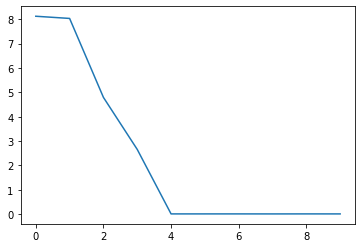

In [4]:
# ... ENTER YOUR CODE HERE ...
def compute_sigma(x, y, m):
    beta = solve_normal_equation(x, y, m)
    y_predict = np.array([predict(_, beta) for _ in x])
    n=len(x)
    sigma = np.sum(np.square(y_predict - np.array(y))) / (n - m)
    return sigma

sigma = []
m_range = range(10)
sigmas = [compute_sigma(x, y, m) for m in m_range]
plt.plot(m_range, sigmas)
plt.show()

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

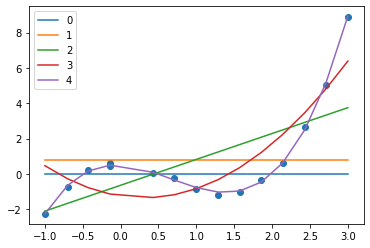

In [5]:
# ... ENTER YOUR CODE HERE
plt.scatter(x,y)
for m in range(5):
    beta = solve_normal_equation(x, y, m)
    y_predict = [predict(_, beta) for _ in x]
    #print(beta)
    plt.plot(x, y_predict, label=m)
    plt.legend()
plt.show()

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [6]:
# ... ENTER YOUR CODE HERE ...
def solve_normal_equation_qr(x, y, m):
    A=design_matrix(x, m)
    Q, R = np.linalg.qr(A) #factorize
    y_rotated = Q.T@y # rotate y by Q.T
    beta=np.linalg.solve(R[:m,:], y_rotated[:m]) #solve R1*beta = f
    return beta

[0.79066667]
[-0.6479869   1.46502399]
[-1.25772058 -0.65313865  1.0667959 ]
[ 0.49483598 -0.26983377 -2.01973166  1.01540301]


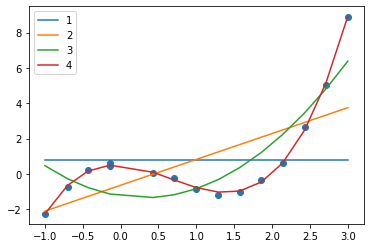

In [7]:
# ... ENTER YOUR CODE HERE
plt.scatter(x,y)
for m in range(1,5):
    beta = solve_normal_equation_qr(x, y, m)
    y_predict = [predict(_, beta) for _ in x]
    print(beta)
    plt.plot(x, y_predict, label=m)
    plt.legend()
plt.show()

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [8]:
# ... ENTER YOUR CODE HERE ...
def f(x):
    return (x**2)*np.cos(x)

def lagrange_k(xval, xk, k):
    n = len(xk)
    term = 1.0
    for j in range(n):
        if j==k: 
            continue
        num = xval - xk[j]
        den = xk[k] - xk[j]
        term *= num / den
    return term

def lagrange(xval, xk, yk):
    return sum(yk[j] * lagrange_k(xval, xk, j) for j in range(len(xk)))

In [9]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

#%matplotlib notebook

def plot_interp(func, nodes, add_legend=True):
    #tabulate
    yy = func(nodes)
    
    #interpolate and evaluate on a finer grid
    xn = np.linspace(np.pi/2, np.pi, 201) 
    yn = [lagrange(_, nodes, yy) for _ in xn]
    
    #plot
    plt.plot(xn, yn, '-', alpha=0.7, label=r'interp, $n=%s$'%len(nodes))
    plt.plot(xn, func(xn), label=r'$f(x)$')
    plt.plot(nodes, yy, 'o', ms=7)
    if add_legend:
        plt.legend(loc='best')
        #s = r"$f(x) = %s $" % sympy.printing.latex(func(sympy.Symbol('x')))
        #plt.text(-1, 0.9, s, fontsize=22)

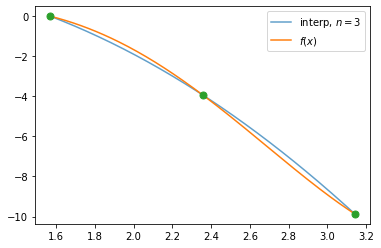

In [10]:
num_points = 3
nodes = np.linspace(np.pi/2, np.pi, num_points)
plot_interp(f, nodes)

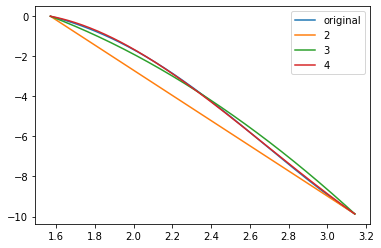

In [12]:
#alternate plot
xv=np.linspace(np.pi/2, np.pi, 201)
fv=[f(x) for x in xv]
plt.plot(xv,fv, label="original")

###lagrange roots
for m in range(2, 5):
    xv_m = np.linspace(np.pi/2,np.pi, m)
    yv_m = [f(x) for x in xv_m]
    langv = [lagrange(_, xv_m, yv_m) for _ in xv]
    # remove this to see result
    plt.plot(xv, langv, label=m)
    
plt.legend()
plt.show()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [25]:
# ... ENTER YOUR CODE HERE ...
def cheb_nodes(n):
    k = np.arange(n)
    return np.cos((2*k+1)*np.pi/(2*n))

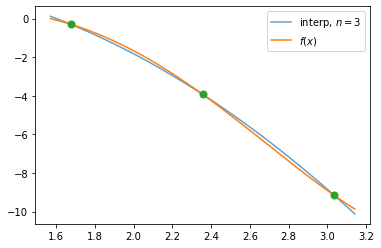

In [39]:
num_points = 3
rightrange = np.pi
leftrange = np.pi/2
nonscaled_nodes = cheb_nodes(num_points)
nodes = (rightrange-leftrange)/(1-(-1))*(nonscaled_nodes-(-1)) + leftrange
plot_interp(f, nodes)

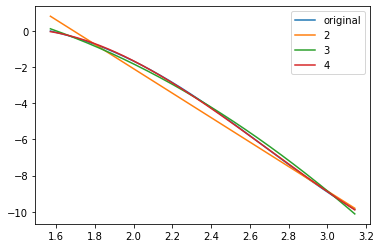

In [40]:
#alternate plot
xv=np.linspace(np.pi/2, np.pi, 201)
fv=[f(x) for x in xv]
plt.plot(xv,fv, label="original")

###lagrange roots
for m in range(2, 5):
    xv_m = (rightrange-leftrange)/(1-(-1))*(cheb_nodes(m)-(-1)) + leftrange
    yv_m = [f(x) for x in xv_m]
    langv = [lagrange(_, xv_m, yv_m) for _ in xv]
    # remove this to see result
    plt.plot(xv, langv, label=m)
    
plt.legend()
plt.show()